In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas_ta as ta

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
# 添加缺失的vwap字段（如果未提供）
if 'vwap' not in df.columns:
    df['vwap'] = df['turnover'] / df['volume']

In [4]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [5]:
def calculate_kup1_flow(df):
    '''
    使用taker_buy_turnover和turnover计算资金净流入比例，增强KUP1。
    高净流入（买方主导）时的上影线更可能预示反转。
    '''
    net_flow = (2 * df['taker_buy_turnover'] - df['turnover']) / df['turnover']
    flow_weight = np.where(net_flow > 0, 1.5, 0.5)
    max_open_close = np.maximum(df['open'], df['close'])
    kup1 = (df['high'] - max_open_close) / df['open']
    return kup1 * flow_weight

# 因子测试

In [6]:
evaluator.set_factor(
    factor_data_or_func=calculate_kup1_flow,
    factor_name='calculate_kup1_flow'
)


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.014355
   Rank_IC (Spearman): 0.004178
📊 信息比率:
   IR: 0.344738
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130745
   因子列: calculate_kup1_flow
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


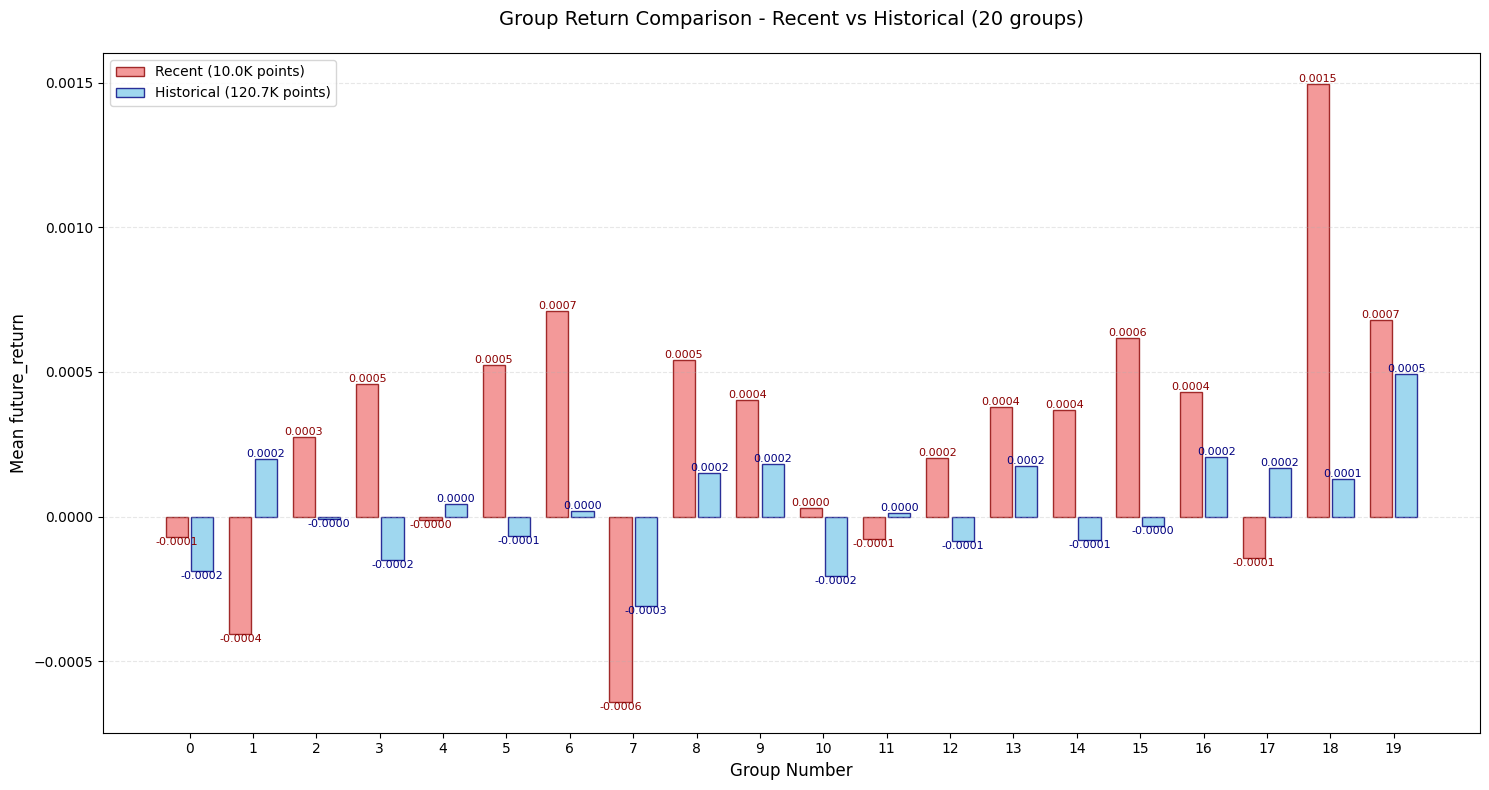

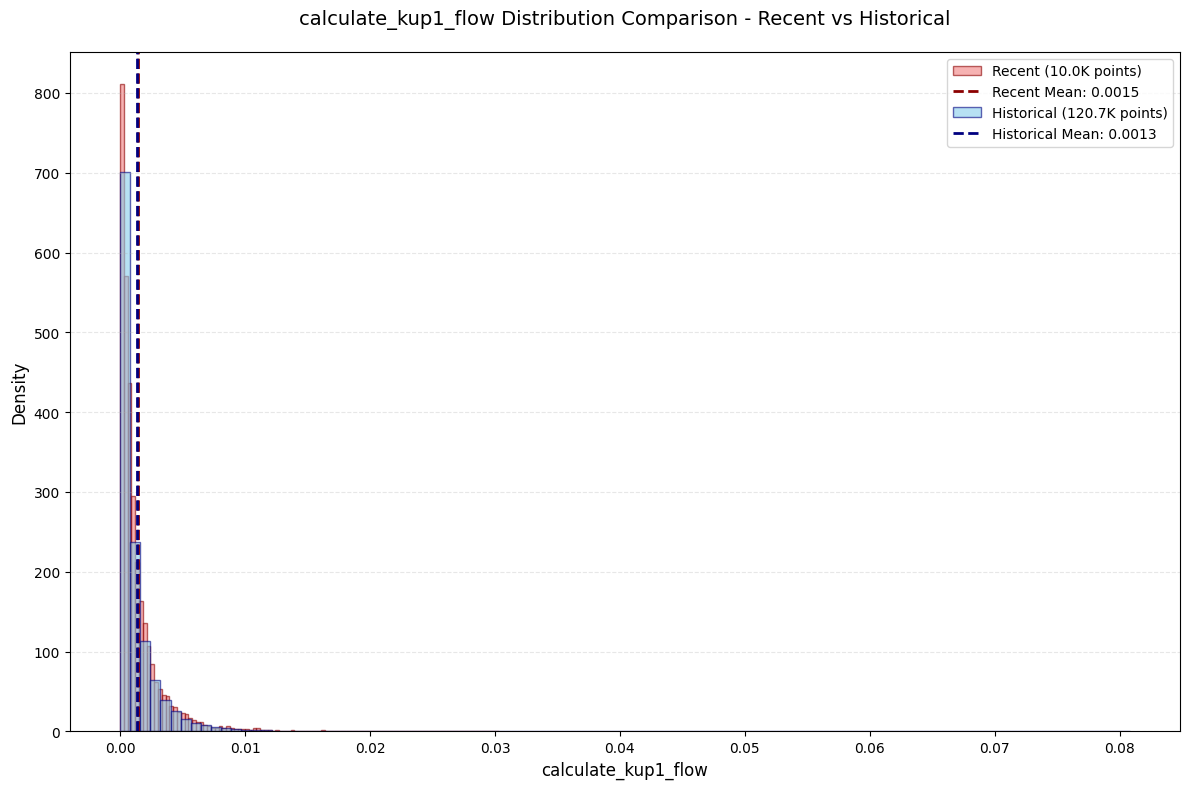

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [7]:
result=evaluator.run_full_evaluation(run_stationarity_test=False)